# Exploratory Data Analysis and Visualization
### An Automobile Case Study

Importing Modules

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


Importing the Dataset

In [3]:
df = pd.read_csv("Automobile_data.csv")
df.head()


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [26]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [4]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


Data Cleaning

In [5]:
df.count().unique()

array([205], dtype=int64)

In [6]:
df = df.replace('?', np.NAN)
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [7]:
df.head()

df['make'].value_counts().head()

toyota        32
nissan        18
mazda         17
mitsubishi    13
honda         13
Name: make, dtype: int64

<AxesSubplot:>

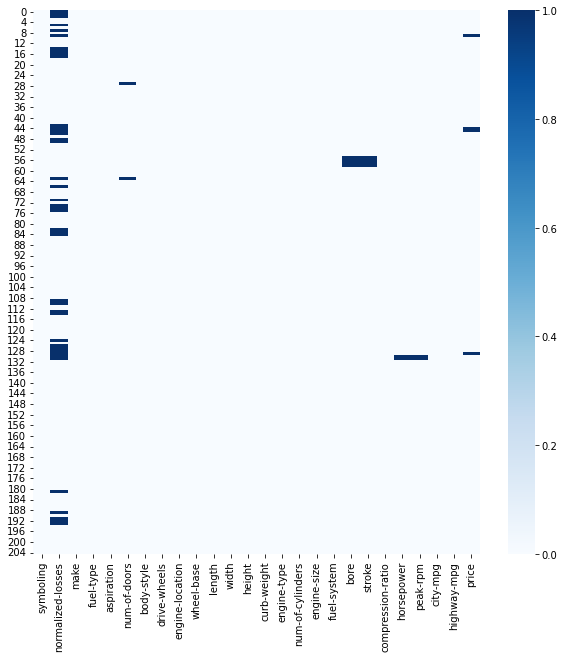

In [8]:

plt.figure(figsize = (10,10))
sns.heatmap(df.isnull(), cmap='Blues')

Visualizing the Data

array([[<AxesSubplot:title={'center':'engine-size'}>,
        <AxesSubplot:title={'center':'peak-rpm'}>],
       [<AxesSubplot:title={'center':'curb-weight'}>,
        <AxesSubplot:title={'center':'horsepower'}>],
       [<AxesSubplot:title={'center':'price'}>, <AxesSubplot:>]],
      dtype=object)

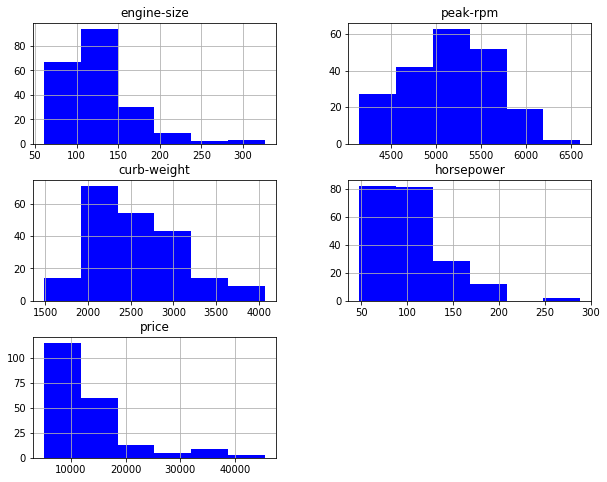

In [27]:
df[['engine-size','peak-rpm','curb-weight','horsepower','price']].hist(figsize=(10,8),bins=6,color='blue')

Inferences

<ul>Most of the car has a Curb Weight is in range 1900 to 3100</ul>
<ul>The Engine Size is inrange 60 to 190</ul>
<ul>Most vehicle has horsepower 50 to 125</ul>
<ul>Most Vehicle are in price range 5000 to 18000</ul>
<ul>peak rpm is mostly distributed between 4600 to 5700</ul>

How Does Price Vary?

The important parameters for the Price variance depends mainly upon the engine parameters like horsepower,engine-size,mpg and the type of car i.e length and width.


In [10]:
cols = ['normalized-losses', 'bore',  'stroke', 'horsepower', 'peak-rpm','price']
for col in cols:
    df[col]=pd.to_numeric(df[col])
    df[col].fillna(df[col].mean(), inplace=True)
df.head()


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


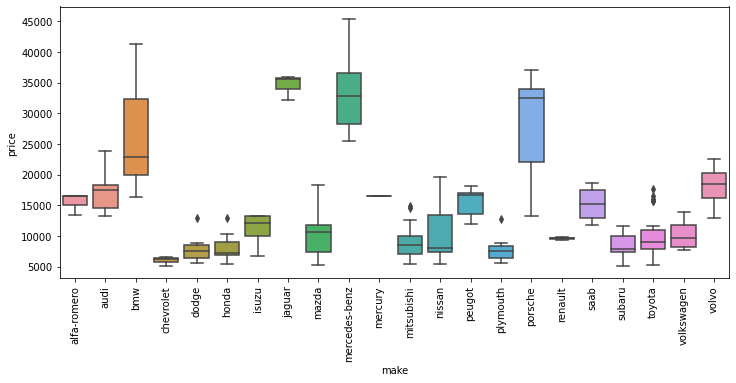

In [11]:
plt.figure(figsize = (12,5))

sns.boxplot(x='make',y='price',data=df)
plt.xticks(rotation = 90)
plt.show()

Expensive Cars
<li> BMW, Mercedes and Porsche produce a large number of luxury cars.</li>
<li> Jaguar produces small range of expensive cars.</li>


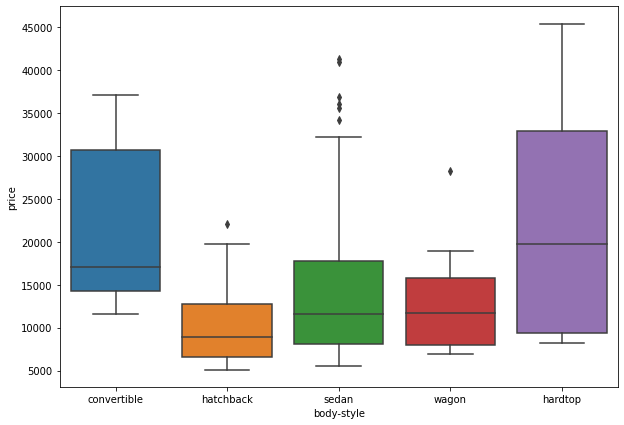

In [12]:
plt.rcParams['figure.figsize']=(10,7)
ax = sns.boxplot(x="body-style", y="price", data=df)

<AxesSubplot:xlabel='price', ylabel='engine-location'>

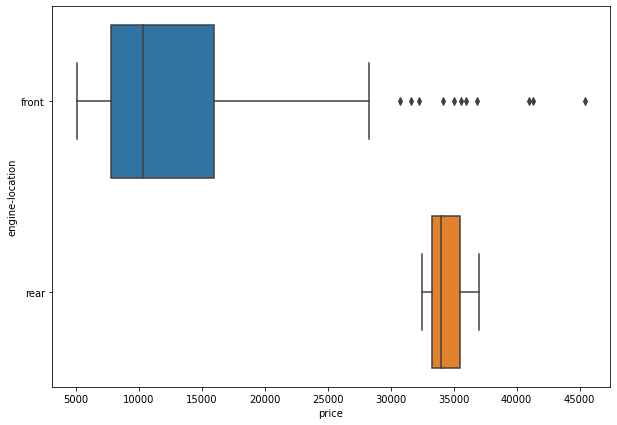

In [13]:
sns.boxplot(x = 'price', y = 'engine-location', data=df)


<AxesSubplot:xlabel='price', ylabel='fuel-type'>

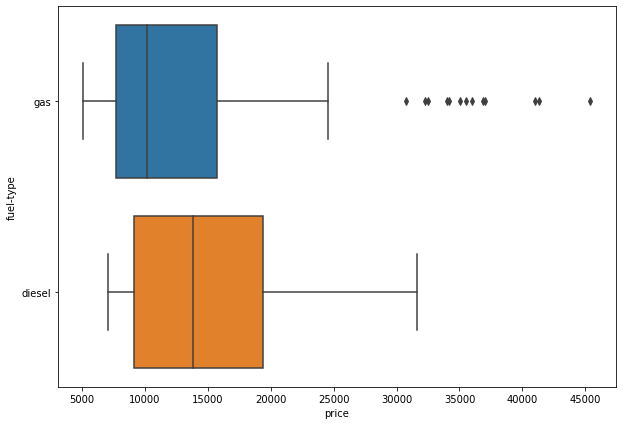

In [14]:
sns.boxplot(x = 'price', y = 'fuel-type', data=df)

Gas V. Diesel
<li> Gas has generally more outliers</li>
<li>Diesel is relatively higher priced.</li>

In [15]:
df['fuel-type'].value_counts()

gas       185
diesel     20
Name: fuel-type, dtype: int64

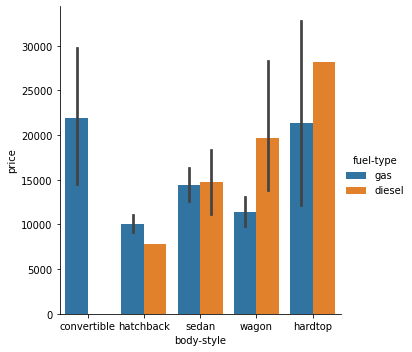

In [16]:
sns.catplot(data=df, x="body-style", y="price", hue="fuel-type", kind= 'bar' )


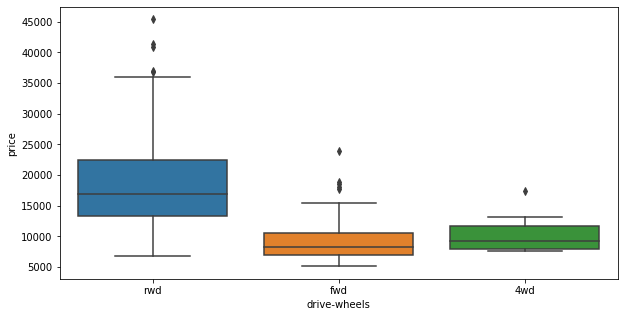

In [17]:
plt.rcParams['figure.figsize']=(10,5)
ax = sns.boxplot(x="drive-wheels", y="price", data=df)

<li>Mercedez-Benz ,BMW, Jaguar, Porshe produces expensive cars more than 25000</li>
<li>cheverolet,dodge, honda,mitbushi, nissan,plymouth subaru,toyata produces budget models with lower prices</li>
<li>most of the cars comapany produces car in range below 25000</li>
<li>Hardtop model are expensive in prices followed by convertible and sedan body style</li>
<li>Turbo models have higher prices than for the standard model</li>
<li>Convertible has only standard edition with expensive cars</li>
<li>hatchback and sedan turbo models are available below 20000</li>
<li>rwd wheel drive vehicle have expensive prices</li>

<AxesSubplot:xlabel='num-of-cylinders', ylabel='horsepower'>

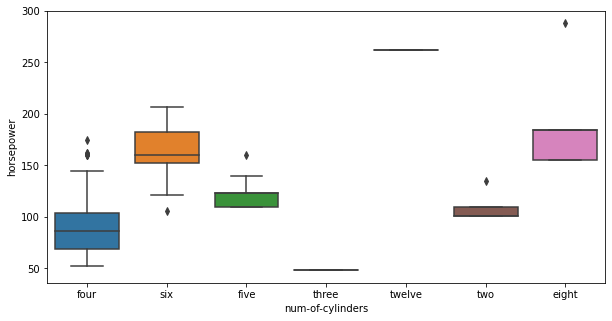

In [18]:
sns.boxplot(x='num-of-cylinders' , y = 'horsepower' , data=df)

Text(0, 0.5, 'City-mpg')

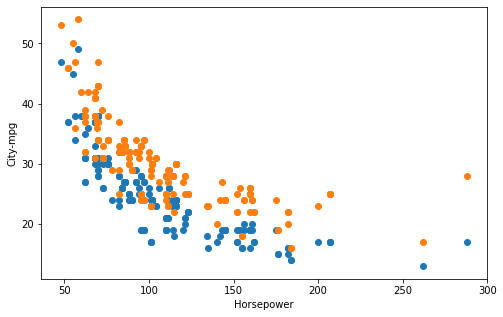

In [19]:
plt.figure(figsize=(8, 5))
plt.scatter(x='horsepower',y='city-mpg',data=df)
plt.scatter(x='horsepower',y='highway-mpg',data=df)
plt.xlabel('Horsepower')
plt.ylabel('City-mpg')

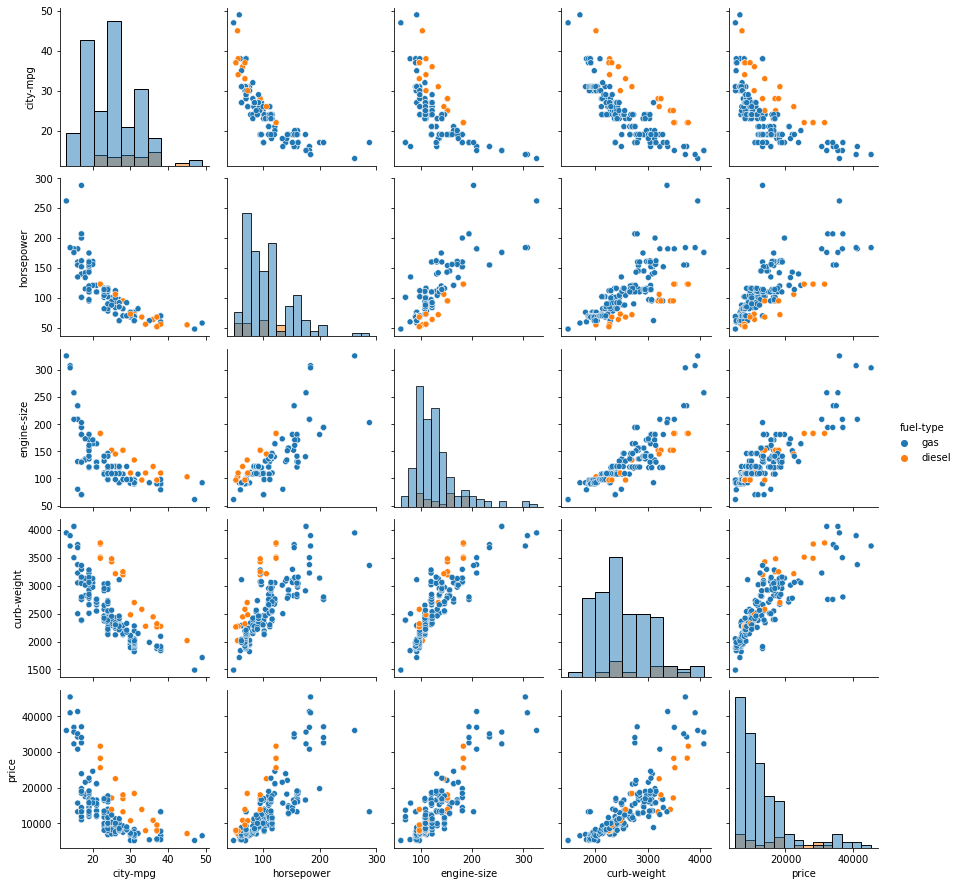

In [20]:
sns.pairplot(df[["city-mpg", "horsepower", "engine-size", "curb-weight", "fuel-type", "price"]], hue="fuel-type", diag_kind="hist")

Findings

Vehicle Mileage decrease as increase in Horsepower , engine-size, Curb Weight

As horsepower increase the engine size increases

Curbweight increases with the increase in Engine Size

Price Analysis

engine size and curb-weight is positively co realted with price

city-mpg is negatively corelated with price as increase horsepower reduces the mileage

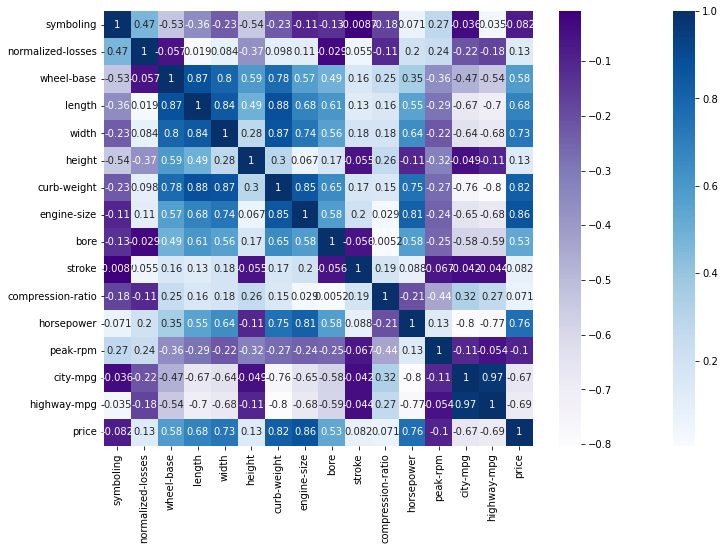

In [21]:
plt.figure(figsize = (12,8))

sns.heatmap(df.corr(),annot = True, cmap='Blues', mask = (df.corr() <= 0 ))
sns.heatmap(df.corr(),annot = True, cmap='Purples', mask = (df.corr() >= 0 ))

plt.show()

Findings

Positive Corelation:

curb-size

engine-size

horsepower


Negative Corelation:

city-mpg,
                                  
highway-mpg 

<AxesSubplot:xlabel='city-mpg', ylabel='price'>

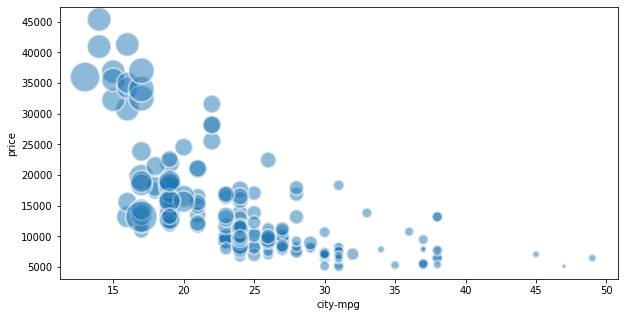

In [22]:
df.columns
sns.scatterplot(data=df , x = "city-mpg" , y="price" , size = "horsepower" ,legend=False, sizes=(20,1000),cmap="Blues", alpha=0.5, edgecolors="grey", linewidth=2)